In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

import datetime
from pandas.tseries.offsets import DateOffset
from pandas.tseries.offsets import MonthEnd

import statsmodels.api as sm
from scipy import stats
import itertools

import gc
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset

path = "BTC-USD.csv"
df = pd.read_csv(path)

# Understanding Data

In [3]:
print('Dataset Shape:', df.shape)

Dataset Shape: (3288, 7)


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3283,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3284,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
3285,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945
3286,2023-12-31,42152.097656,42860.937500,41998.253906,42265.187500,42265.187500,16397498810
3287,2024-01-01,42280.234375,42831.003906,42227.503906,42817.222656,42817.222656,15160324096


In [6]:
print('Data Info:', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3288 non-null   object 
 1   Open       3288 non-null   float64
 2   High       3288 non-null   float64
 3   Low        3288 non-null   float64
 4   Close      3288 non-null   float64
 5   Adj Close  3288 non-null   float64
 6   Volume     3288 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.9+ KB
Data Info: None


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3.288000e+03
mean,15038.515537,15389.980094,14660.348897,15050.073186,15050.073186,1.708131e+10
std,16244.777395,16634.536688,15807.953069,16246.954922,16246.954922,1.915119e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1186.287537,1206.827515,1172.422485,1187.855011,1187.855011,3.361940e+08
50%,8660.375976,8831.566894,8392.174805,8660.093750,8660.093750,1.278290e+10
75%,25264.314453,25957.333008,24909.188477,25620.604980,25620.604980,2.741347e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


# Exploratory Data Analysis

In [8]:
# We adjust the Date Format to be all the same Year-Month-Day
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# We set the Date to be the Index
df.set_index('Date', inplace=True)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945


In [10]:
# here we just resample the dataset based on daily monthly yearly frequency

# Resampling to Daily frequency
df_day = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

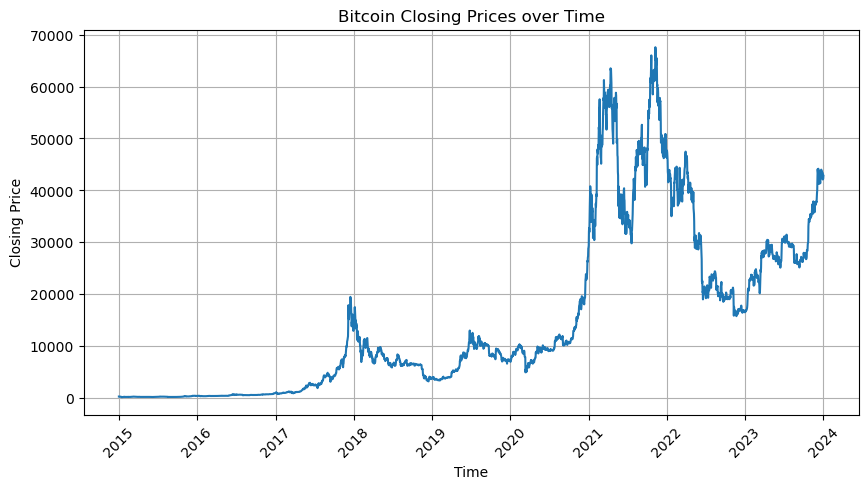

In [11]:
# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

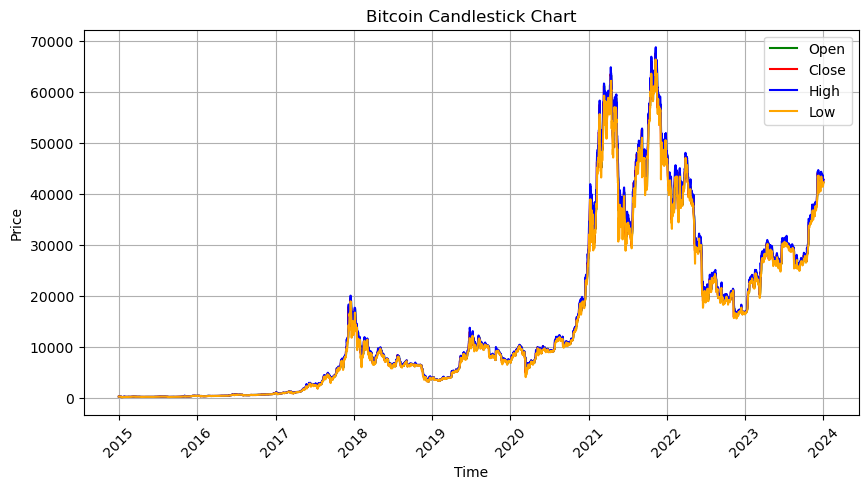

In [12]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

* Nothing is clear
* The value remains close for all the variables
* There is a huge increase in all the prices in 2018 and 2021 with 2018 peak to be lower than 2021.

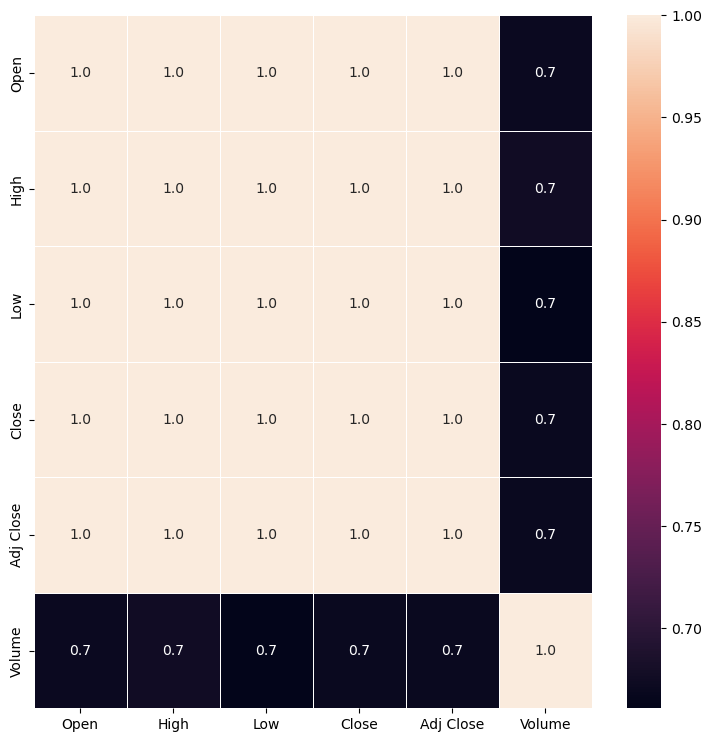

In [13]:
# We will see the correlation between each feature
import seaborn as sns

f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

* Open, High, Low, Close, and Adj Close: These variables represent the opening, highest, lowest, closing, and adjusted closing prices of Bitcoin for each day. They have a perfect positive correlation of 1.0 with each other, meaning they move in the same direction and by the same amount. This makes sense because the prices of Bitcoin are determined by the market demand and supply, which are reflected in these variables.

* Volume: This variable represents the number of Bitcoins traded for each day. It has a moderate positive correlation of 0.7 with the other variables, meaning it tends to move in the same direction but not by the same amount. This indicates that there is some relationship between the trading volume and the price movements of Bitcoin, but it is not very strong or consistent. There may be other factors that affect the volume, such as news, events, or sentiment.

The metric that makes the most sense to predict would be the Close prices of bitcoins. Again, we are going to use the daily resampled dataset from now on and the prediction will be done using that dataset.


Most time-series data is composed of three elements:

* Season - a repeating cycle in the series
* Trend - an upwards or downwards movement in the series
* Residual or noise - random variation in the data

Some literature also adds "level" to the decomposition. A "level" can be described as the average value in the series.

Seasonal decomposition can be a great way structured approach to a time series problem. The acquired information is useful when thinking about the specific problem and planing the future approach to the model. I am going to use the automatic seasonal decomposition tool and plot the results.

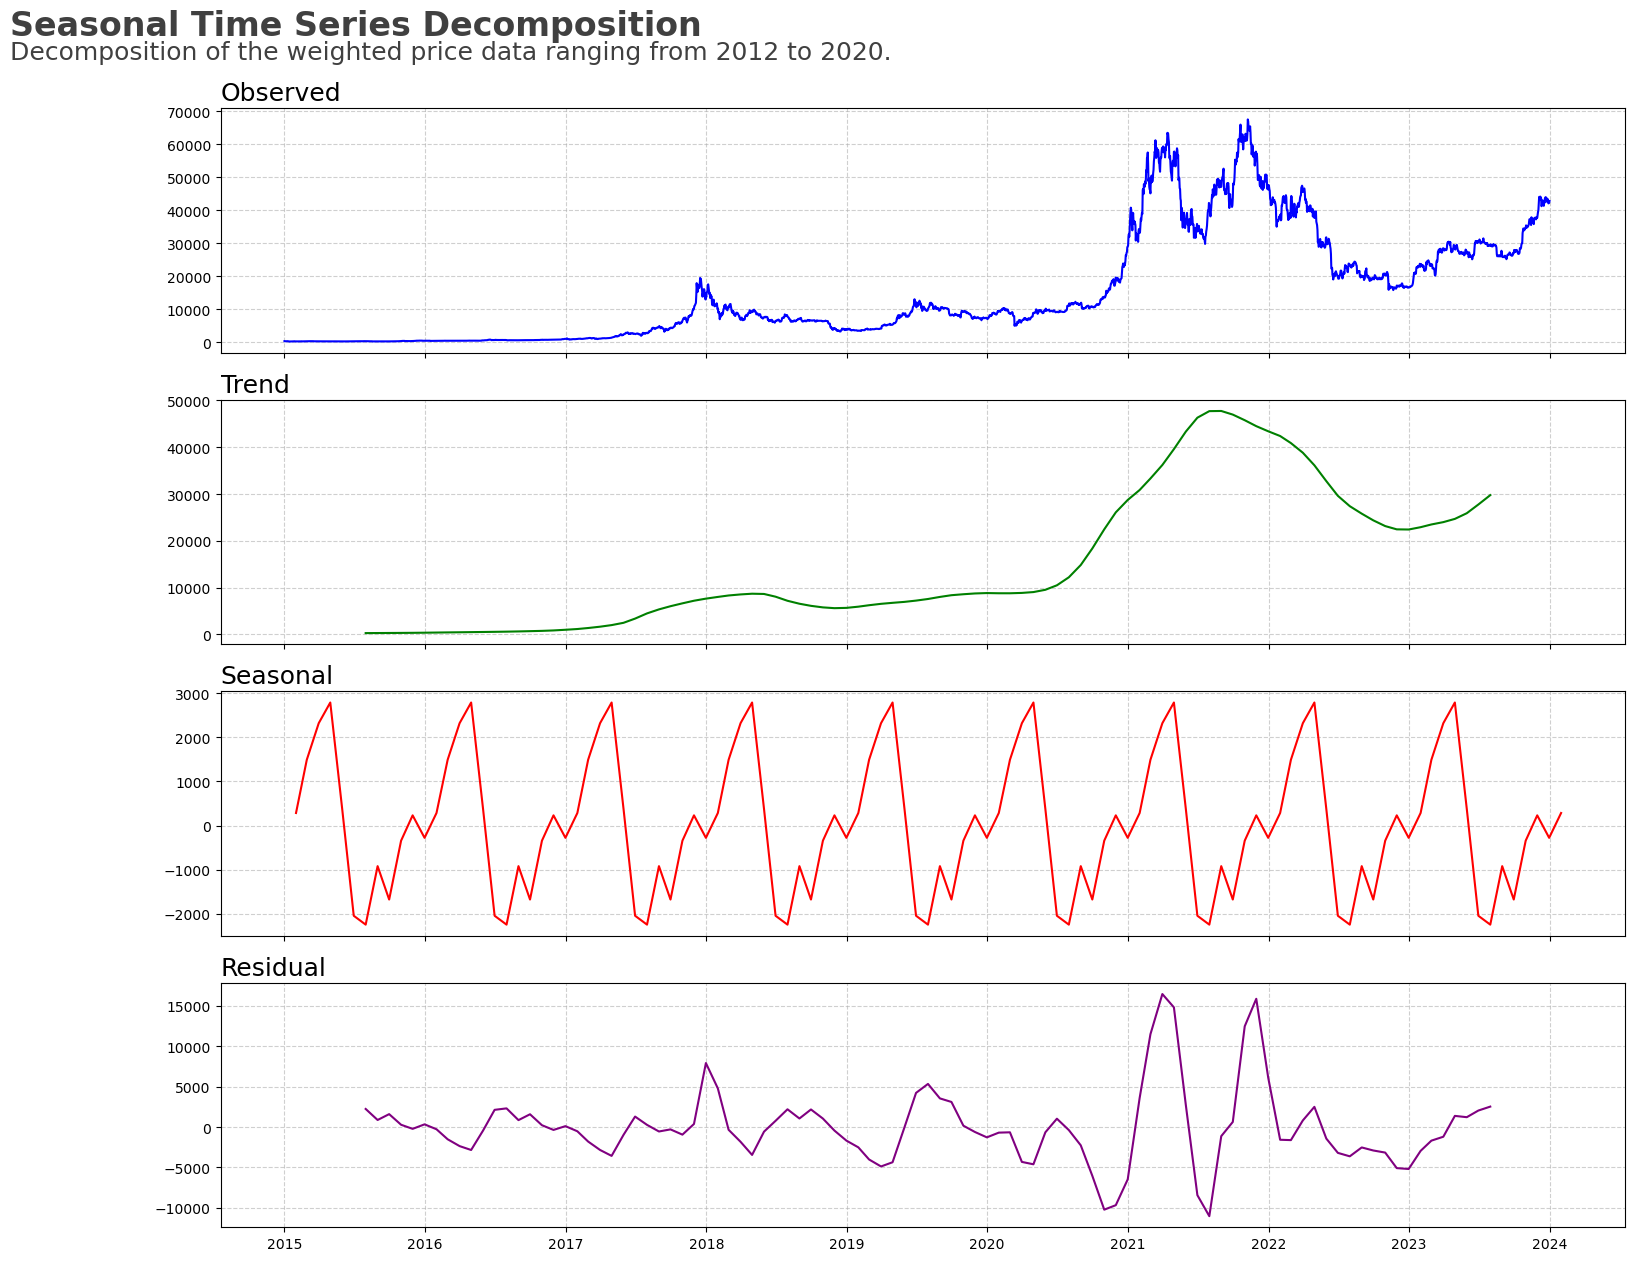

In [22]:
# Seasonal Decompose
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True, gridspec_kw={'width_ratios': [1], 'height_ratios': [1, 1, 1, 1]})

dec = sm.tsa.seasonal_decompose(df_month["Close"])

# Plotting the observed data
axs[0].plot(df_day["Close"], label="Close Price", color='b')
axs[0].set_title("Observed", loc="left", fontsize=18)
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plotting the trend component
axs[1].plot(dec.trend, label="Trend", color='g')
axs[1].set_title("Trend", loc="left", fontsize=18)
axs[1].grid(True, linestyle='--', alpha=0.6)

# Plotting the seasonal component
axs[2].plot(dec.seasonal, label="Seasonal", color='r')
axs[2].set_title("Seasonal", loc="left", fontsize=18)
axs[2].grid(True, linestyle='--', alpha=0.6)

# Plotting the residual component
axs[3].plot(dec.resid, label="Residual", color='purple')
axs[3].set_title("Residual", loc="left", fontsize=18)
axs[3].grid(True, linestyle='--', alpha=0.6)

# Adjust layout and add title texts with increased left spacing
plt.subplots_adjust(left=0.1)
plt.tight_layout()
plt.text(x=-0.15, y=1.30, s="Seasonal Time Series Decomposition", fontsize=24, weight="bold", alpha=0.75, transform=axs[0].transAxes)
plt.text(x=-0.15, y=1.20, s="Decomposition of the weighted price data ranging from 2015 to 2024.", fontsize=18, alpha=0.75, transform=axs[0].transAxes)

plt.show()


From the plot above we can see a few things:

* Bitcoin prices are facing a strong upward trend.
* There are some seasonal elements to the price (+- 2000)
* Most of the noise in the data was generated during the "hype" phase of 2018-2022.

# Stationarity

**What is stationarity?** Stationarity in (plain English) means that the statistical properties of a ceratin variable do not change over time.

**Why you do it?** It simplifies the whole analytics process and allows for a structured approach to the problem.

**Do I need it for SERIMAX?** Not really. Statsmodels SARIMAX has a (by default enabled option) that enforces stationarity. However, it is a great tool to analyse the data and should be used.

Its common practice to use it and most models nowadays assume that the data is stationary. To determine the stationarity of data we are going to use the Dickey-Fuller test. The DF tests a null hypothesis that a unit root is present in an autoregressive model. If the value is less then <0.05 then the data is stationary.

In [26]:
# Dickey-Fuller stationarity test 
p_value_before = sm.tsa.adfuller(df_month["Close"])[1]
print("Dicky-Fuller stationarity test - p: %f" % p_value_before)

Dicky-Fuller stationarity test - p: 0.621289


**Box-Cox**

Box-Cox comes from the family of power transformations and is often used as a mean to stabilize variance in a dataset. It is indexed by lambda and in certain times can be used as a differencing technique.

In [27]:
# Box-Cox transformation
df_month["Box-Cox"], _ = stats.boxcox(df_month["Close"])

# Dickey-Fuller stationarity test after Box-Cox transformation
p_value_after = sm.tsa.adfuller(df_month["Box-Cox"])[1]
print("Dicky-Fuller stationarity test (After Box-Cox) - p: %f" % p_value_after)

Dicky-Fuller stationarity test (After Box-Cox) - p: 0.632580


As we see the Box-Cox transformation did not significantly impact the stationarity of the time series.

**Panads diff()**

Pandas library provides an option for automatic differencing with diff().

In [29]:
# Automatic Differencing

first_diff = df_month["Close"].diff()
print("Dicky-Fuller stationarity test - p: %f" % sm.tsa.adfuller(first_diff[1:])[1])

df_month["Auto_Diff"] = first_diff

Dicky-Fuller stationarity test - p: 0.000000


As we see, when you applied automatic differencing to our time series data (df_month["Auto_Diff"]), the Dickey-Fuller stationarity test resulted in a very low p-value (0.000000). In simpler terms, this low p-value suggests strong evidence that the transformed data is now stationary.


Stationary data is easier to analyze and model. The automatic differencing likely helped remove trends or patterns that could have made the original data non-stationary. This makes the transformed data more suitable for reliable analysis and interpretation. You can tell the doctor that the process of automatic differencing has made the time series "stationary," providing a solid foundation for further analysis.

Now lets plot the seasonal decomposition and AC & PAC on the stationary data so we can see the results.

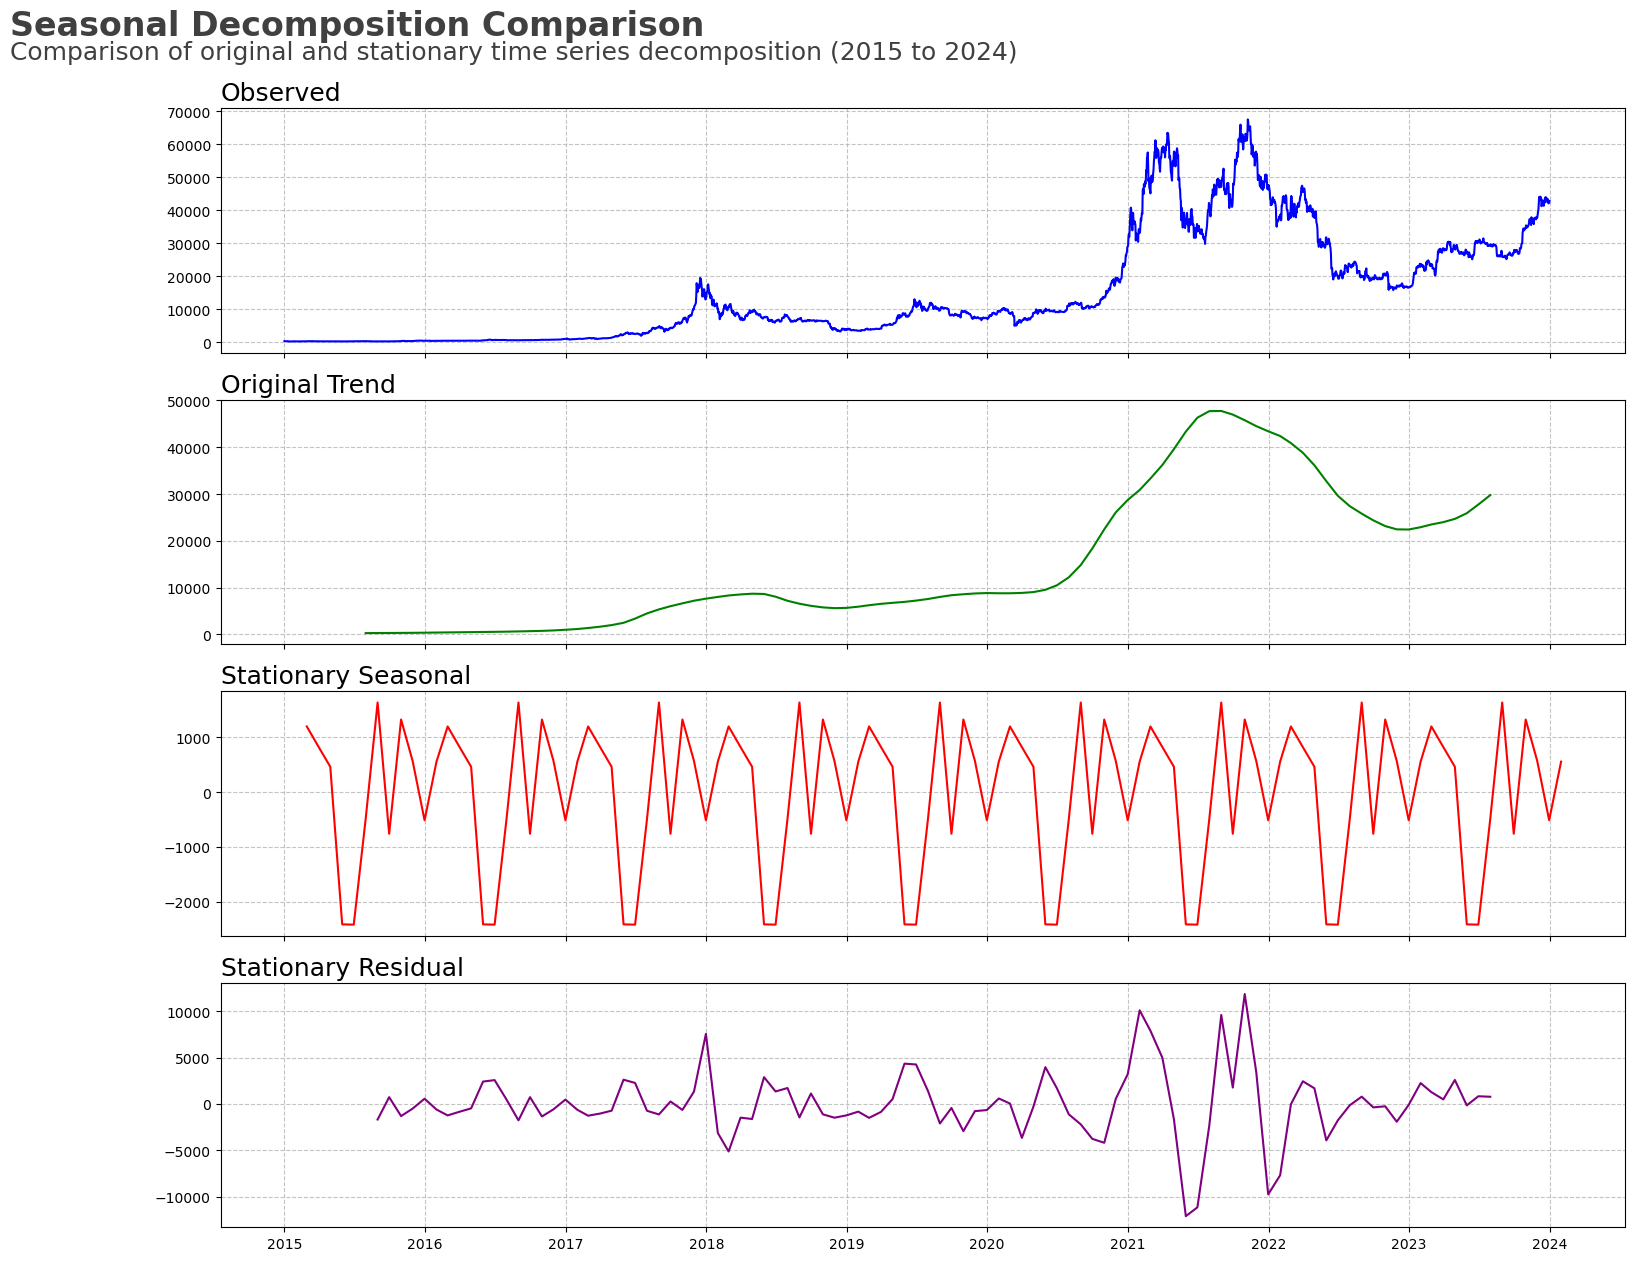

In [32]:
# Original time series decomposition
original_dec = sm.tsa.seasonal_decompose(df_month["Close"])

# Decomposition on stationary series
stationary_dec = sm.tsa.seasonal_decompose(df_month["Auto_Diff"][1:])

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plotting the observed data
axs[0].plot(df_day["Close"], label="Close Price", color='b')
axs[0].set_title("Observed", loc="left", fontsize=18)
axs[0].grid(True, linestyle='--', alpha=0.75)

# Plotting the trend component of the original series
axs[1].plot(original_dec.trend, label="Trend", color='g')
axs[1].set_title("Original Trend", loc="left", fontsize=18)
axs[1].grid(True, linestyle='--', alpha=0.75)

# Plotting the seasonal component of the stationary series
axs[2].plot(stationary_dec.seasonal, label="Seasonal", color='r')
axs[2].set_title("Stationary Seasonal", loc="left", fontsize=18)
axs[2].grid(True, linestyle='--', alpha=0.75)

# Plotting the residual component of the stationary series
axs[3].plot(stationary_dec.resid, label="Residual", color='purple')
axs[3].set_title("Stationary Residual", loc="left", fontsize=18)
axs[3].grid(True, linestyle='--', alpha=0.75)

# Adjust layout and add title texts
plt.tight_layout()
plt.text(x=-0.15, y=1.30, s="Seasonal Decomposition Comparison", fontsize=24, weight="bold", alpha=0.75, transform=axs[0].transAxes)
plt.text(x=-0.15, y=1.20, s="Comparison of original and stationary time series decomposition (2015 to 2024)", fontsize=18, alpha=0.75, transform=axs[0].transAxes)

plt.show()

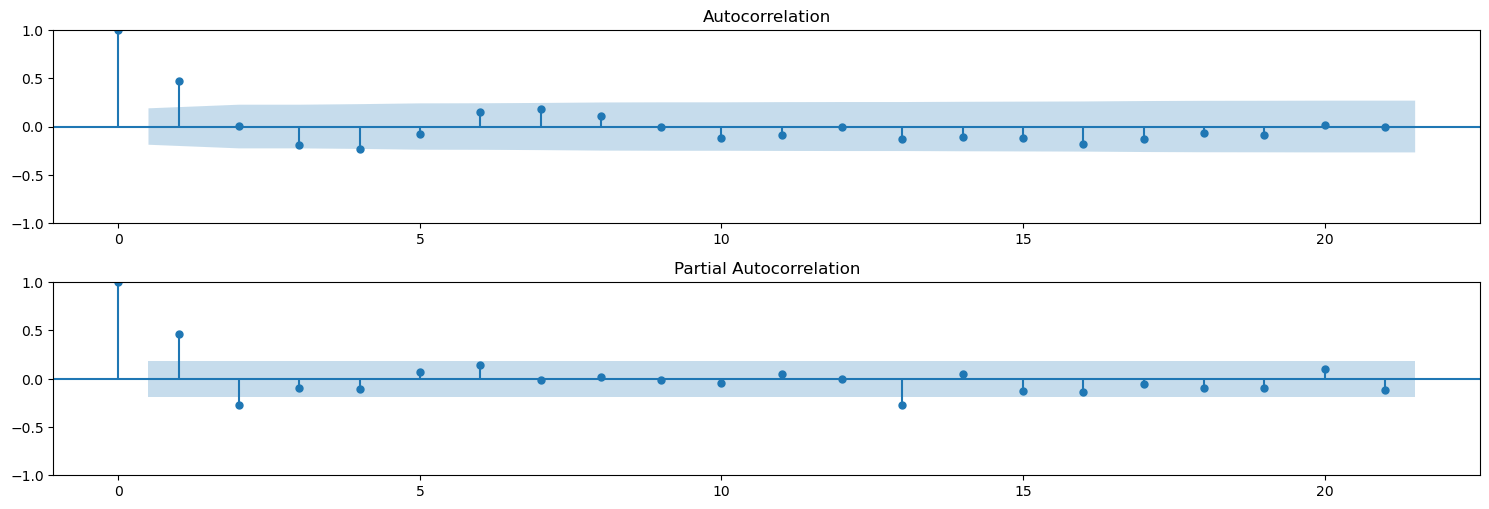

In [36]:
ax, fig = plt.subplots(figsize=(15,10))

plt.subplot(411)
x = sm.graphics.tsa.plot_acf(first_diff[1:], ax=plt.gca())
plt.subplot(412)
y = sm.graphics.tsa.plot_pacf(first_diff[1:],ax=plt.gca())
plt.tight_layout()

plt.show()
gc.collect()
del x,y

The graphs indicate that there is no strong relationship between the values of the dataset at different time points, except for the obvious fact that each value is perfectly correlated with itself. This means that you cannot use the past values of the dataset to predict the future values or to identify any seasonal or cyclical patterns. The dataset is essentially noise, and you might need to use a different method of analysis or a different source of data to find any meaningful insights.

# SARIMAX

SARIMAX is short for the Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model. It is a widely used forecasting method for univariate time-series forecasting SARIMAX can handle both trends and seasonality in data. This makes it an excellent choice in forecasting data that has both of these elements.

In [37]:
###SARIMAX###

#Constructs all possible parameter combinations.
# (p: autoregressive order, d: differencing order, q: moving average order).
p = d = q = range(0,2) # creates a range of values from 0 to 1 for each parameter.
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [38]:
def sarimax_function(data,pdq,s_pdq):

    """
    The function uses a brute force approach to apply all possible pdq combinations and evaluate the model
    """

    result_list = []
    for param in pdq:
        for s_param in s_pdq:

            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=s_param,
            enforce_invertibility=False,enforce_stationarity=False)

            results = model.fit()
            result_list.append([param,s_param,results.aic])
            print("ARIMA Parameters: {} x: {}. AIC: {}".format(param,s_param,results.aic))

    return result_list,results

The evaluation metric for the model selection was AIC (Akaike Information Criterion -> AIC=ln (sm2) + 2m/T). As a model selection tool, AIC has some limitations as it only provides a relative evaluation of the model. However, it is an excellent metric for checking the general quality of a model such as SARIMAX.

Let's start training

In [39]:
result_list,results = sarimax_function(df_month["Close"],pdq,seasonal_pdq)

gc.collect()

ARIMA Parameters: (0, 0, 0) x: (0, 0, 0, 12). AIC: 2472.602771913432
ARIMA Parameters: (0, 0, 0) x: (0, 0, 1, 12). AIC: 2241.4718450593077
ARIMA Parameters: (0, 0, 0) x: (0, 1, 0, 12). AIC: 2145.73047942418
ARIMA Parameters: (0, 0, 0) x: (0, 1, 1, 12). AIC: 1875.2422070496664
ARIMA Parameters: (0, 0, 0) x: (1, 0, 0, 12). AIC: 2162.834747793989
ARIMA Parameters: (0, 0, 0) x: (1, 0, 1, 12). AIC: 2133.198460338369
ARIMA Parameters: (0, 0, 0) x: (1, 1, 0, 12). AIC: 1898.3823361176615
ARIMA Parameters: (0, 0, 0) x: (1, 1, 1, 12). AIC: 1880.0689272302839
ARIMA Parameters: (0, 0, 1) x: (0, 0, 0, 12). AIC: 2373.058991964149
ARIMA Parameters: (0, 0, 1) x: (0, 0, 1, 12). AIC: 2103.3214886620312
ARIMA Parameters: (0, 0, 1) x: (0, 1, 0, 12). AIC: 2045.8602103486196
ARIMA Parameters: (0, 0, 1) x: (0, 1, 1, 12). AIC: 1789.1753502179479
ARIMA Parameters: (0, 0, 1) x: (1, 0, 0, 12). AIC: 2046.6318377367452
ARIMA Parameters: (0, 0, 1) x: (1, 0, 1, 12). AIC: 2096.680692499753
ARIMA Parameters: (0, 0, 1)

6

To explain the output:

**ARIMA Parameters ((p, d, q)):**
* This represents the non-seasonal order of the SARIMAX model. For example, (1, 1, 1) means an autoregressive order of 1, differencing order of 1, and moving average order of 1.

**Seasonal Parameters ((P, D, Q, S)):**
* This represents the seasonal order of the SARIMAX model. For example, (1, 0, 1, 12) means a seasonal autoregressive order of 1, seasonal differencing order of 0, seasonal moving average order of 1, and a seasonal period of 12 (monthly).

**AIC (Akaike Information Criterion):**
* AIC is a measure of the model's goodness of fit, balancing the quality of the fit with the complexity of the model. Lower AIC values indicate a better-fitting model.

* The SARIMAX function iterates over all combinations of these parameters and fits a SARIMAX model for each combination. The output provides the AIC value for each model, and the goal is typically to choose the model with the lowest AIC, as it represents the best trade-off between fit quality and model complexity.

* In out case, the output shows the AIC values for various combinations of non-seasonal and seasonal parameters, and we selected the combination with the lowest AIC as the optimal SARIMAX model for our time series data.

In [40]:
#Dataframe of all results and parameters.

results_dataframe = pd.DataFrame(result_list, columns=["dpq","s_dpq","aic"]).sort_values(by="aic")
results_dataframe.head()

,dpq,s_dpq,aic
31,"(0, 1, 1)","(1, 1, 1, 12)",1590.326664
63,"(1, 1, 1)","(1, 1, 1, 12)",1590.635024
59,"(1, 1, 1)","(0, 1, 1, 12)",1597.570578
27,"(0, 1, 1)","(0, 1, 1, 12)",1598.469143
55,"(1, 1, 0)","(1, 1, 1, 12)",1611.691896


In [41]:
model = sm.tsa.statespace.SARIMAX(df_month["Close"], order=(0, 1, 1), seasonal_order=(1, 1, 1, 12),
            enforce_invertibility=False,enforce_stationarity=False).fit()
print(model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5575      0.060      9.274      0.000       0.440       0.675
ar.S.L12       0.0259      0.149      0.174      0.862      -0.265       0.317
ma.S.L12      -1.2323      0.072    -17.232      0.000      -1.372      -1.092
sigma2      1.049e+07   8.86e-09   1.18e+15      0.000    1.05e+07    1.05e+07


Moving Average (MA):
The lag-1 moving average term is significant (coef: 0.5575, p-value < 0.05), indicating that the past one-period lag of the forecast errors has an impact on the current observation.

Seasonal Moving Average (SMA):
The lag-12 seasonal moving average term is significant (coef: -1.2323, p-value < 0.05), suggesting a significant impact of the past one-year lag of the seasonal forecast errors on the current observation.

Seasonal Autoregressive (SAR):
The lag-12 seasonal autoregressive term is not significant (coef: 0.0259, p-value > 0.05), indicating that the past one-year lag of the seasonal observations does not significantly impact the current observation.

Variance of Residuals (Sigma2):
The estimated variance of the residuals is 1.049e+07, representing the variability of the differences between the observed and predicted values.


In conclusion, the significant MA and SMA terms suggest that the model considers the impact of recent forecast errors, both non-seasonal and seasonal, on the current observation. However, the SAR term is not significant, indicating that the seasonal pattern in the observations does not significantly impact the current observation. It's important to consider these results in the context of the specific time series and conduct further model diagnostics.

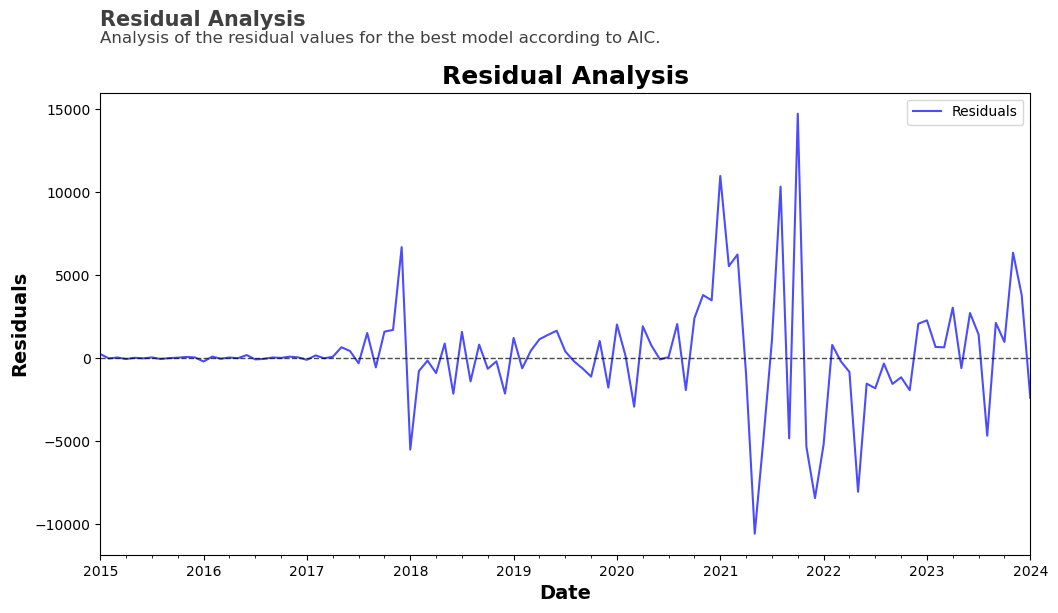

6021

In [47]:
# Assuming 'model' is your SARIMAX model
residuals = model.resid

# Residual analysis plot
plt.figure(figsize=(12, 6))
residuals.plot(label="Residuals", color='blue', alpha=0.7)

# Highlight zero line
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)

# Customize labels and legend
plt.title("Residual Analysis", fontsize=18, weight="bold")
plt.xlabel("Date", fontsize=14, weight="bold")
plt.ylabel("Residuals", fontsize=14, weight="bold")
plt.legend()

# Add additional text
plt.text(datetime.date(2015, 1, 1), 20000, "Residual Analysis", fontsize=15, weight="bold", alpha=0.75)
plt.text(datetime.date(2015, 1, 1), 19000, "Analysis of the residual values for the best model according to AIC.", fontsize=12, alpha=0.75)

# Show the plot
plt.show()

# Memory management
plt.close()
gc.collect()

* The graph shows how well a model can predict the price of bitcoin over time.
* The model should have small and consistent errors, which are the differences between the actual and predicted prices.
* The graph shows that the model has small and consistent errors until 2020, but then the errors become large and unpredictable.
* This means that the model is not good at predicting the price of bitcoin after 2020, and it needs to be improved or changed. It also means that something happened in 2020 that affected the price of bitcoin in a way that the model did not expect

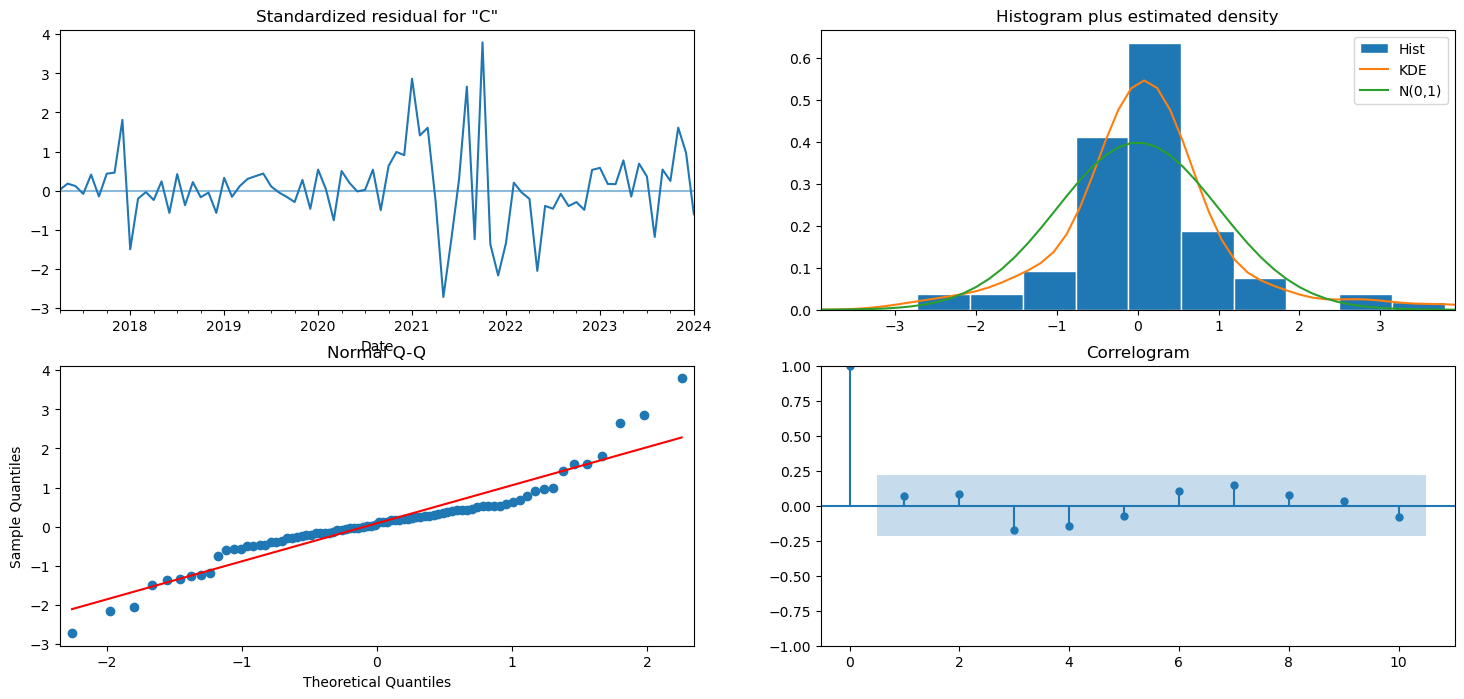

In [48]:
x = model.plot_diagnostics(figsize=(18, 8))

gc.collect()
del x

* Standardized Residual for “C”: This plot shows how much the model’s predictions differ from the actual data over time. The differences should be small and consistent, but they are not, especially after 2020. This means the model is not very accurate or reliable.

* Histogram Plus Estimated Density: This plot shows how the data is distributed or spread out. The blue bars show how many data points fall into different ranges. The lines show how well the data fits to certain shapes or patterns. The data is close to a normal shape, which is good for some types of analysis.

* Normal Q-Q: This plot also shows how the data is distributed or compared to a normal shape. The points should follow the red line if the data is normal. The points are close to the line, but not exactly on it, which means the data is approximately normal, but not perfectly normal.

* Correlogram: This plot shows how the data is related to itself at different time intervals or lags. The blue bars show the confidence intervals, which are the ranges where the relationship is likely to be true. The points outside the bars show the significant relationships, which are the ones that are unlikely to happen by chance. The plot shows that the data has some significant relationships at certain lags, which means the data is not random or independent.

In [71]:
df_month_prediction = df_month[["Close"]]

df_month_prediction["Forcasting"] = model.predict(start=df_month.index.min(), end=df_month.index.max() + pd.DateOffset(months=1))


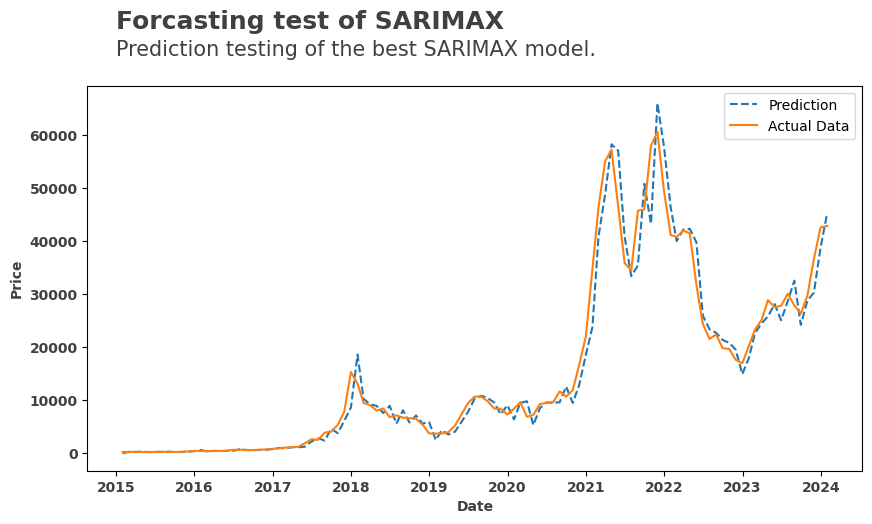

3742

In [73]:
ax, fig = plt.subplots(figsize = (10,5))

plt.plot(df_month_prediction["Forcasting"], ls="--", label="Prediction")
plt.plot(df_month_prediction["Close"], label="Actual Data")

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")

plt.legend()

plt.text(x=datetime.date(2015, 1, 1), y=80000, s="Forcasting test of SARIMAX",
fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2015, 1, 1), y=75000, s="Prediction testing of the best SARIMAX model.",
         fontsize=15, alpha=0.75)

plt.show()
gc.collect()

In [92]:
def sarimax_predict(df, target_year):

    # SARIMAX modeling
    model = sm.tsa.statespace.SARIMAX(df_month["Close"], order=(0, 1, 1), seasonal_order=(1, 1, 1, 12),
                                      enforce_invertibility=False, enforce_stationarity=False).fit()

    # Generate future dates for prediction
    future_dates = [df_month.index[-1] + DateOffset(months=x) for x in range(1, 13 * (target_year - df_month.index[-1].year))]
    future_dates = pd.to_datetime(future_dates) + MonthEnd(0)
    future = pd.DataFrame(index=future_dates)

    # Prediction
    future["Future_forcast"] = model.predict(start=future_dates[0], end=future_dates[-1])

    # Plotting
    ax, fig = plt.subplots(figsize=(10, 5))
    plt.plot(df_month["Close"], label="Actual")
    plt.plot(future["Future_forcast"], ls="--", label="Prediction")

    plt.xticks(alpha=0.75, weight="bold")
    plt.yticks(alpha=0.75, weight="bold")

    plt.xlabel("Date", alpha=0.75, weight="bold")
    plt.ylabel("Price", alpha=0.75, weight="bold")

    plt.text(x=datetime.date(2015, 1, 1), y=70000, s="SARIMAX Forecasting",
             fontsize=18, weight="bold", alpha=0.75)
    plt.text(x=datetime.date(2015, 1, 1), y=65000, s=f"Prediction of the weighted price for the next {target_year - df_month.index[-1].year} years.",
             fontsize=15, alpha=0.75)

    plt.legend()
    plt.show()
    gc.collect()

    return future["Future_forcast"]


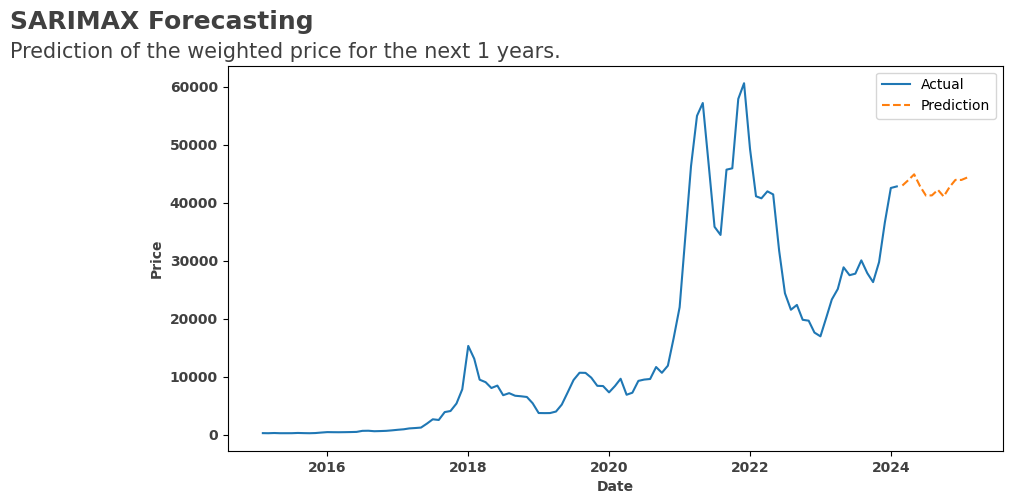

In [94]:
target_year = 2025
predictions = sarimax_predict(df, target_year)